In [1]:
!pip install uszipcode
#!pip install geopandas

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from uszipcode import SearchEngine
import geopandas as geo
from shapely import wkt
import folium

<h1>1 - Análise Inicial para indicar os imóveis <h1>

In [54]:
# Carregando o dataset
df = pd.read_csv(r'kc_house_data.csv')

In [55]:
# Conhecendo a qtd de linhas e colunas
df.shape

(21613, 21)

In [56]:
# Resumo do dateset, para conhecer os tipos de dados e valores nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
# Visualizando o dataset
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


Datas -> Normalizando a coluna 'date' e criando as colunas 'year' e 'month'

In [59]:
# Ajustando o formato data, sem as horas
df['date'] = pd.to_datetime(df['date'])   

In [60]:
# Criação de coluna year
df['year'] = df['date'].dt.year

# Criação de coluuna month
df['month'] = df['date'].dt.month   

In [62]:
# Checando as principais estatísticas
df.describe(include='all').T

C:\Users\micsilva\AppData\Local\Temp\ipykernel_2220\1674475646.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaT,NaN,NaT,NaT,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,2014-06-23,142,2014-05-02,2015-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaT,NaN,NaT,NaT,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaT,NaN,NaT,NaT,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaT,NaN,NaT,NaT,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaT,NaN,NaT,NaT,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaT,NaN,NaT,NaT,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaT,NaN,NaT,NaT,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaT,NaN,NaT,NaT,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaT,NaN,NaT,NaT,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


In [63]:
 # Checando que não há valores nulos
df.isnull().mean(axis=0)  

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
year             0.0
month            0.0
dtype: float64

In [64]:
# criação da coluna com  preço médio da sqft_living
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [65]:
# Gropby por data, para contar a quantidade de registros por dia
df_date = df.groupby('date')['id'].count().reset_index()         

In [66]:
# Plotando Gráfico para visualizar a qtd de registros por dia ao longo do período
fig = px.line(df_date, x='date', y='id', markers=True, width=1400, height=400)

fig.update_layout(title='Nº de casas vendidas - Maio/2014 e Maio/2015',
                   xaxis_title='Date',
                   yaxis_title='Price',
                  plot_bgcolor = 'white',
                  font = {'family': 'Arial','size': 18,'color': 'black'})

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes()

fig.show()

In [67]:
# Criação de dataframe com a média de preços ao longo do período
df_mean_price = df.groupby(['date'])['price'].mean().reset_index()  # Gropby por data, calculando a média dos preços

#  Plotando o Gráfico
fig = px.line(df_mean_price, x='date', y='price', markers=True, width=1400, height=400)

fig.update_layout(title='Preço Médio ao longo do Período',
                   xaxis_title='Date',
                   yaxis_title='Price Mean',
                  plot_bgcolor = 'white',
                  font = {'family': 'Arial','size': 18,'color': 'black'}
                  )

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes()

fig.show()


In [68]:
# Criando a coluna mês_ano, por que não exite no df
df['month_year'] = df['date'].dt.to_period('M').astype(str) 

#Groupby por mês com a média de preço
df_mean_month_price = df.groupby(['month_year'])['price'].mean().reset_index() #Groupby por mês com a média de preço

#  Plotando o Gráfico
fig = px.line(df_mean_month_price, x="month_year", y="price", markers=True, width=1400, height=400)

fig.update_layout(title='Preço Médio',
                   xaxis_title='Month Year',
                   yaxis_title='Price',
                  plot_bgcolor = 'white',
                  font = {'family': 'Arial','size': 18,'color': 'black'}
                  )

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes()

fig.show()

In [69]:
# Criação de coluna com o preço médio da sqft_living
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Criação de coluna com o preço médio da sqft_living
df['price_per_sqftLot'] = df['price'] / df['sqft_lot'] 

In [70]:
# Groupby por mês/ano com a média de preço por sqft_living e por sqftLot
df_mean_price_sqft_liv_lot = df.groupby(['month_year'])[['price_per_sqft', 'price_per_sqftLot']].mean().reset_index() 

In [71]:
#  Plotando o Gráfico com a média de preço por sqft no período mês/ano
fig = px.line(df_mean_price_sqft_liv_lot, x="month_year", y="price_per_sqft", markers=True, width=1400, height=400)


fig.update_layout(title='Preço médio por SQFT',
                   xaxis_title='Month Year',
                   yaxis_title='Price',
                  plot_bgcolor = 'white',
                  font = {'family': 'Arial','size': 18,'color': 'black'}
                  )

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes()

fig.show()

In [72]:
#  Plotando o Gráfico com a média de preço por sqftLot no período mês/ano
fig = px.line(df_mean_price_sqft_liv_lot, x="month_year", y="price_per_sqftLot", markers=True, width=1400, height=400)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_mean_price_sqft_liv_lot['month_year'], y=df_mean_price_sqft_liv_lot['price_per_sqft'],
                    mode='lines+markers',
                    name='SQFT_living'))

fig.add_trace(go.Scatter(x=df_mean_price_sqft_liv_lot['month_year'], y=df_mean_price_sqft_liv_lot['price_per_sqftLot'],
                    mode='lines',
                    name='SQFTLot'))



fig.update_layout(title='Preço por SQFTLot',
                   xaxis_title='Month Year',
                   yaxis_title='Price',
                  plot_bgcolor = 'white',
                  font = {'family': 'Arial','size': 18,'color': 'black'}
                  )

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes()

fig.show()

In [73]:
# Visualizando todas as colunas do dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month',
       'price_per_sqft', 'month_year', 'price_per_sqftLot'],
      dtype='object')

In [74]:
# definição das colunas que considerei mais importante.
df_heatmap = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15' ]]

<AxesSubplot:>

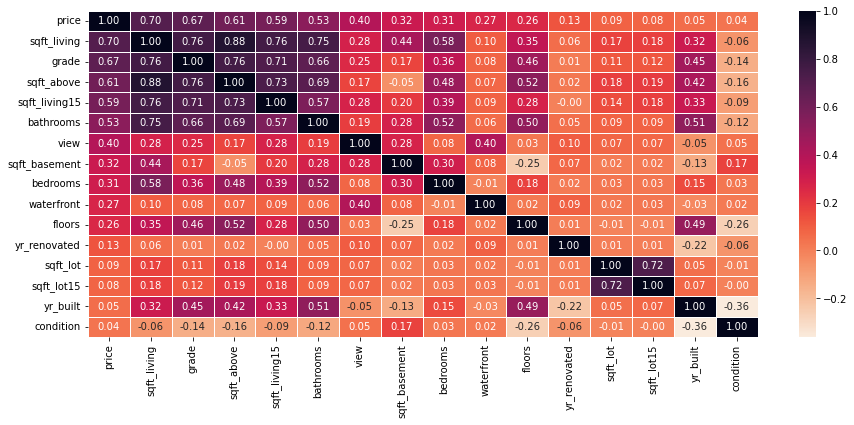

In [75]:
# Plotando um gráfico de heatmap, com a correlação das colunas mais importantes
f, ax = plt.subplots(figsize=(15,6))

matcorr = df_heatmap.corr()                   # Encontra a correlação entre as colunas do dataframe
cols = matcorr.nlargest(16, 'price').index    # retorna a coluna price ordenada do maior para o menor
cm = np.corrcoef(df_heatmap[cols].values.T)   # Retorna o Coeficiente de Correlação de Person, usando os valores da variavel cols, para aplicar o transpose(), atraves da propriedade T


sns.heatmap(cm, 
            annot=True, 
            fmt=".2f", 
            linewidth=.5,
            xticklabels=cols.values, 
            yticklabels=cols.values,
            cmap=sns.cm.rocket_r)

In [76]:
# Criando um dataframe para correlacionar as colunas mais importantes, focando a região mais escura do gráfico
df_heatmap_top9= df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_lot15', 'bathrooms', 'view', 'sqft_lot', 'sqft_living15' ]]

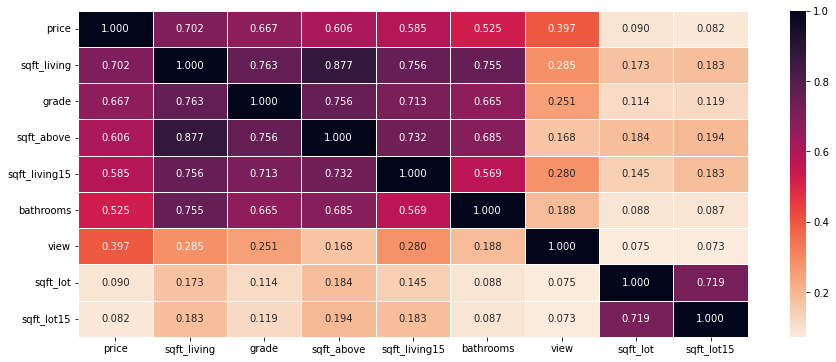

In [77]:
# Pelo heatmap, há uma correlação entre alguns atributos, que irei destacar no próximo gráfico
f, ax = plt.subplots(figsize=(15,6))

matcorr = df_heatmap_top9.corr()            # Encontra a correlação entre as colunas do dataframe
cols = matcorr.nlargest(9, 'price').index   # retorna a coluna price ordenada do maior para o menor
cm = np.corrcoef(df_heatmap[cols].values.T) # Retorna o Coeficiente de Correlação de Person, usando os valores da variavel cols, para aplicar o transpose(), atraves da propriedade T

sns.heatmap(cm, 
            annot=True,
            annot_kws={"size": 10},
            fmt=".3f", 
            linewidth=.5,
            xticklabels=cols.values, 
            yticklabels=cols.values,
            cmap=sns.cm.rocket_r);          

In [78]:
# Plotando um gráfico de dispersão para checar a relaçao de preço e sqft_living
fig = px.scatter(df, x="sqft_living", y="price", size = "price",
                  width=1400, height=600)


fig.update_layout(title='Price - sqft_living',
                   xaxis_title='SQFT_Living',
                   yaxis_title='Price',
                  plot_bgcolor = 'white',
                  font = {'family': 'Arial','size': 18,'color': 'black'}
                  )

fig.update_xaxes( showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
showline=True, linewidth=1, linecolor='black')

fig.update_yaxes()

fig.show()


In [79]:
# Buscar utilizando a coluna zipcode, o nome do munícípio na lib SearchEngine, e inserir no dataframe

search = SearchEngine()

def get_city_from_zipcode(zipcode):
    result = search.by_zipcode(zipcode)
    return result.major_city


df['city_'] = df['zipcode'].apply(get_city_from_zipcode)

In [80]:
# Checando a criação da coluna 'city_'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21613 non-null  int64         
 1   date               21613 non-null  datetime64[ns]
 2   price              21613 non-null  float64       
 3   bedrooms           21613 non-null  int64         
 4   bathrooms          21613 non-null  float64       
 5   sqft_living        21613 non-null  int64         
 6   sqft_lot           21613 non-null  int64         
 7   floors             21613 non-null  float64       
 8   waterfront         21613 non-null  int64         
 9   view               21613 non-null  int64         
 10  condition          21613 non-null  int64         
 11  grade              21613 non-null  int64         
 12  sqft_above         21613 non-null  int64         
 13  sqft_basement      21613 non-null  int64         
 14  yr_bui

In [81]:
# Criação de um dataframe com o preço médio do sqft_living por cidade
df_mean_price_city = df.groupby('city_')[['price', 'price_per_sqft', 'zipcode']].mean().reset_index()
df_mean_price_city.sort_index()

,city_,price,price_per_sqft,zipcode
0,Auburn,2.914815e+05,153.044820,98036.241228
1,Bellevue,8.981876e+05,340.335312,98005.932480
2,Black Diamond,4.236660e+05,210.095356,98010.000000
3,Bothell,4.903515e+05,225.987235,98011.000000
4,Carnation,4.556171e+05,223.084512,98014.000000
5,Duvall,4.247887e+05,203.001725,98019.000000
6,Enumclaw,3.157093e+05,181.806440,98022.000000
7,Fall City,5.805268e+05,255.233620,98024.000000
8,Federal Way,2.893849e+05,151.864892,98015.811297
9,Issaquah,6.150913e+05,260.549165,98027.875853


In [82]:
# Criação da coluna preço médio da área habital por cidade no dataframe 
price_per_sqft_city_df = []

for index_A, row_A in df.iterrows():
    for index_B, row_B in df_mean_price_city.iterrows():
        if row_A['city_'] == row_B['city_']:
          price_per_sqft_city_df.append(row_B['price_per_sqft'])
            
df['price_per_sqft_city'] = price_per_sqft_city_df

In [83]:
# Checando a criação da coluna 'price_per_sqft_city'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21613 non-null  int64         
 1   date                 21613 non-null  datetime64[ns]
 2   price                21613 non-null  float64       
 3   bedrooms             21613 non-null  int64         
 4   bathrooms            21613 non-null  float64       
 5   sqft_living          21613 non-null  int64         
 6   sqft_lot             21613 non-null  int64         
 7   floors               21613 non-null  float64       
 8   waterfront           21613 non-null  int64         
 9   view                 21613 non-null  int64         
 10  condition            21613 non-null  int64         
 11  grade                21613 non-null  int64         
 12  sqft_above           21613 non-null  int64         
 13  sqft_basement        21613 non-

In [84]:
# Irei indicar os 5 melhores imóveis que apresentam o preço médio sqft_living, menor que o preço médio sqft_living do município
best_houses = pd.DataFrame(df.sort_values(by=['price_per_sqft','price_per_sqft_city'], ascending=True).head(5))
print("Os 5 melhores imóveis para comprar são:")
best_houses[['id', 'price', 'price_per_sqft','price_per_sqft_city', 'sqft_living', 'city_']]

Os 5 melhores imóveis para comprar são:


,id,price,price_per_sqft,price_per_sqft_city,sqft_living,city_
18262,2891000610,148900.0,87.588235,153.044820,1700,Auburn
3785,723049156,149000.0,87.647059,304.774958,1700,Seattle
13825,5637200450,257000.0,87.713311,196.573536,2930,Renton
17197,5111400086,110000.0,88.000000,173.656235,1250,Maple Valley
1385,3342700465,250000.0,88.028169,196.573536,2840,Renton


In [85]:
## Irei indicar os 5 piores imóveis que apresentam o preço médio sqft_living, maior que o preço médio sqft_living do município
worst_houses = pd.DataFrame(df.sort_values(by=['price_per_sqft', 'price_per_sqft_city'], ascending=False).head(5))
print("Os 5 piores imóveis para comprar são:")
worst_houses[['id', 'price', 'price_per_sqft','price_per_sqft_city','sqft_living', 'city_']]

Os 5 piores imóveis para comprar são:


,id,price,price_per_sqft,price_per_sqft_city,sqft_living,city_
19336,6021500970,874950.0,810.138889,304.774958,1080,Seattle
4013,724069059,2400000.0,800.000000,267.003458,3000,Sammamish
10446,1118000320,3400000.0,798.122066,304.774958,4260,Seattle
8623,6303400395,325000.0,792.682927,304.774958,410,Seattle
9314,4389200610,903000.0,792.105263,340.335312,1140,Bellevue


<h1> 2 - Plotar no Mapa, os imóveis indicado como os 5 melhores e os 5 piores<h1>

In [86]:
# Carregando o dataset geojson para auxiliar a plotagem dos imóveis no mapa
df_geo = geo.read_file(r'King_county_zip.geojson')


In [87]:
# Conhecendo os dados do dataframe
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    85 non-null     int64   
 1   ZIP         85 non-null     int64   
 2   COUNTY      85 non-null     int64   
 3   ZIP_TYPE    85 non-null     object  
 4   Shape_Leng  85 non-null     float64 
 5   Shape_Area  85 non-null     float64 
 6   geometry    85 non-null     geometry
dtypes: float64(2), geometry(1), int64(3), object(1)
memory usage: 4.8+ KB


In [88]:
# Como o dataset não possui uma coluna com o nome do município, irei criar uma coluna
search = SearchEngine()

def get_city_from_zipcode(zipcode):
    result = search.by_zipcode(zipcode)
    return result.major_city


df_geo['city_'] = df_geo['ZIP'].apply(get_city_from_zipcode)

In [89]:
# Para adequar o dataframe para realizar o join com outra tabela, com um dado comum nas duas, é preciso indicar a coluna 'city_' como index
df_geo = df_geo.set_index('city_')


In [90]:
# Como a coluna city do df_geo, virou id, vou inserir o municipio novamente
def get_city_from_zipcode(zipcode):
    result = search.by_zipcode(zipcode)
    return result.major_city


df_geo['city'] = df_geo['ZIP'].apply(get_city_from_zipcode)

In [91]:
# Adequar o index do dataframe preço medio sqft_living por município, para usar a colunas 'city_'
df_set_zip = df_mean_price_city.set_index('city_')
df_set_zip



,price,price_per_sqft,zipcode
city_,,,
Auburn,2.914815e+05,153.044820,98036.241228
Bellevue,8.981876e+05,340.335312,98005.932480
Black Diamond,4.236660e+05,210.095356,98010.000000
Bothell,4.903515e+05,225.987235,98011.000000
Carnation,4.556171e+05,223.084512,98014.000000
Duvall,4.247887e+05,203.001725,98019.000000
Enumclaw,3.157093e+05,181.806440,98022.000000
Fall City,5.805268e+05,255.233620,98024.000000
Federal Way,2.893849e+05,151.864892,98015.811297


In [92]:
# Combinando as duas tabelas usando
merged = df_geo.join(df_set_zip)

In [93]:
# ajustando a projeção de mapa da tabela para plotar no folium
merged.to_crs

<bound method GeoDataFrame.to_crs of              OBJECTID    ZIP  COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
city_                                                                         
Auburn             42  98002      33  Standard  102448.491058  2.055688e+08   
Auburn             43  98001      33  Standard  156155.469416  5.324255e+08   
Auburn             56  98092      33  Standard  263990.586474  1.214591e+09   
Baring            108  98224      33    PO Box  187335.039773  1.720745e+09   
Bellevue           34  98008      33  Standard   93748.353883  1.538018e+08   
...               ...    ...     ...       ...            ...           ...   
Snoqualmie         66  98065      33  Standard  345717.472070  2.404509e+09   
Tacoma            188  98422      33  Standard    9173.558049  1.574725e+06   
Vashon             48  98070      33  Standard  272819.693396  1.010296e+09   
Woodinville        49  98072      33  Standard  119472.966725  3.767946e+08   
Woodinville    

In [94]:
# Checando os tipos de dados do dataframe
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 85 entries, Auburn to Woodinville
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        85 non-null     int64   
 1   ZIP             85 non-null     int64   
 2   COUNTY          85 non-null     int64   
 3   ZIP_TYPE        85 non-null     object  
 4   Shape_Leng      85 non-null     float64 
 5   Shape_Area      85 non-null     float64 
 6   geometry        85 non-null     geometry
 7   city            85 non-null     object  
 8   price           79 non-null     float64 
 9   price_per_sqft  79 non-null     float64 
 10  zipcode         79 non-null     float64 
dtypes: float64(5), geometry(1), int64(3), object(2)
memory usage: 10.0+ KB


In [95]:
# Alterando o tipo da coluna 'city' para string, pois a a lib Folium não aceita o tipo object para tematização
merged['city'] = merged['city'].astype('string')
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 85 entries, Auburn to Woodinville
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        85 non-null     int64   
 1   ZIP             85 non-null     int64   
 2   COUNTY          85 non-null     int64   
 3   ZIP_TYPE        85 non-null     object  
 4   Shape_Leng      85 non-null     float64 
 5   Shape_Area      85 non-null     float64 
 6   geometry        85 non-null     geometry
 7   city            85 non-null     string  
 8   price           79 non-null     float64 
 9   price_per_sqft  79 non-null     float64 
 10  zipcode         79 non-null     float64 
dtypes: float64(5), geometry(1), int64(3), object(1), string(1)
memory usage: 10.0+ KB


In [ ]:
# Plotando os dados no mapa

# Declarando o crs para garantir a projeção do mapa
crs = {'init': 'epsg:4326'}

# Criando as variáveis para o controle de layer
imoveis_zip = folium.FeatureGroup(name='Imóveis', show=False)
best_imoveis = folium.FeatureGroup(name='Best 5 Houses', show=True)
worst_imoveis = folium.FeatureGroup(name='Worst 5 Houses', show=True)


# Carregando o container de mapa com a localização da região
folium_map = folium.Map(location=[47.5059562,-121.8496996],zoom_start=10, tiles='cartodbpositron')

# Plotando os polígonos da região
folium.features.GeoJson(
                    data=merged,
                    name='city',
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5, 'border': '2px solid black'},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['city',
                                'price_per_sqft'],
                        aliases=["City:",
                                 "price_per_sqft"], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(folium_map)   


# Plotando as 5 melhores indicações

for _, v in best_houses.iterrows():
  popup = folium.Popup(
      """
      Id : <b>%s</b><br>
      Price : <b>%s</b><br> 
      Price per sqft_living : <b>%s</b><br>
      Price per sqft_living per city : <b>%s</b><br>
      City : <b>%s</b><br>
      
      """% (v['id'],
            v['price'],
            v['price_per_sqft'] ,
            v['price_per_sqft_city'],
            v['city_']            
            ), max_width=400)
  folium.Marker(location=[v['lat'], v['long']],
                      radius=2,
                      popup=popup,
                      icon=folium.Icon(color='green'),
                      fill_opacity = 0.9
                      ).add_to(best_imoveis)

# Plotando as 5 piores indicações

for _, v in worst_houses.iterrows():
  popup = folium.Popup(
      """
      Id : <b>%s</b><br>
      Price : <b>%s</b><br> 
      Price per sqft_living : <b>%s</b><br>
      Price per sqft_living per city : <b>%s</b><br>
      City : <b>%s</b><br>
      
      """% (v['id'],
            v['price'],
            v['price_per_sqft'] ,
            v['price_per_sqft_city'],
            v['city_']         
            ), max_width=400)
  folium.Marker(location=[v['lat'], v['long']],
                      radius=2,
                      popup=popup,
                      icon=folium.Icon(color='red'),
                      fill_opacity = 0.9
                      ).add_to(worst_imoveis)


# Plotando todos imoveis, mas que ficará oculto e será visualizado pelo layer de controle
for _, v in df.iterrows():
  popup = folium.Popup(
      """
      Nome : <b>%s</b><br>
      """% (v['city_'],), max_width=400)
  folium.CircleMarker(location=[v['lat'], v['long']],
                      radius=2,
                      popup=popup,
                      fill_color='blue',
                      color='blue',
                      fill_opacity = 0.9
                      ).add_to(imoveis_zip)



# Adicionando todos layers ao container
folium_map.add_child(best_imoveis)
folium_map.add_child(worst_imoveis)
folium_map.add_child(imoveis_zip)

# Adicionando o controle de layer
folium.LayerControl().add_to(folium_map)

# Plotando o mapa
folium_map


#folium_map.save('hc_house.html')  # Para salver em html